In [13]:
import tensorflow as tf

In [14]:
mnist=tf.keras.datasets.mnist

In [15]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [16]:
x_train.shape

(60000, 28, 28)

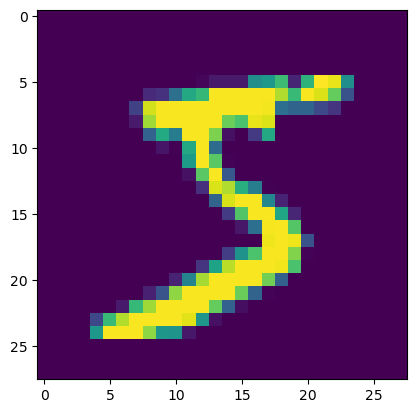

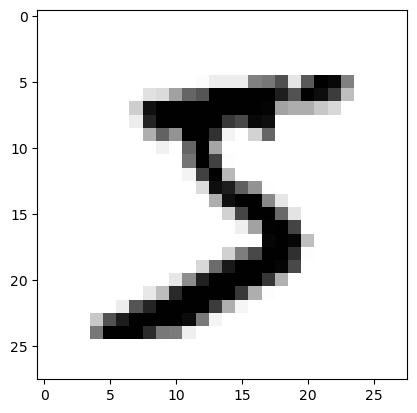

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [18]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

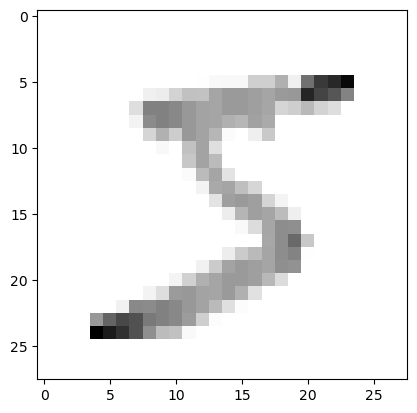

In [19]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [20]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [21]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print('Training samples dimension',x_trainr.shape)
print('Testing samples dimension',x_testr.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [23]:
model= Sequential()
model.add(Conv2D(64,(3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), input_shape=x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))


In [24]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


In [25]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.3112 - accuracy: 0.9039 - val_loss: 0.1290 - val_accuracy: 0.9607
Epoch 2/5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.1028 - accuracy: 0.9690 - val_loss: 0.0927 - val_accuracy: 0.9723
Epoch 3/5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0734 - accuracy: 0.9768 - val_loss: 0.0726 - val_accuracy: 0.9785
Epoch 4/5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0586 - accuracy: 0.9817 - val_loss: 0.0726 - val_accuracy: 0.9772
Epoch 5/5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.0729 - val_accuracy: 0.9793


In [26]:
test_loss, test_acc=model.evaluate(x_testr,y_test)
print("test loss on 10,000 test samples",test_loss)
print('validation accuracy on 10,000 test samples',test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0684 - accuracy: 0.9794
test loss on 10,000 test samples 0.06843481212854385
validation accuracy on 10,000 test samples 0.9793999791145325


In [27]:
predictions=model.predict([x_testr])

313/313 [==============================] - 2s 6ms/step


In [28]:
print(np.argmax(predictions[0]))

7


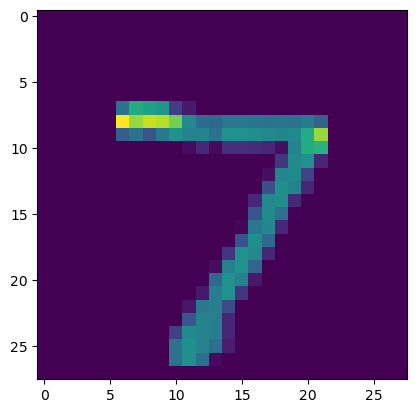

In [29]:
plt.imshow(x_test[0])

In [30]:
print(np.argmax(predictions[128]))

8


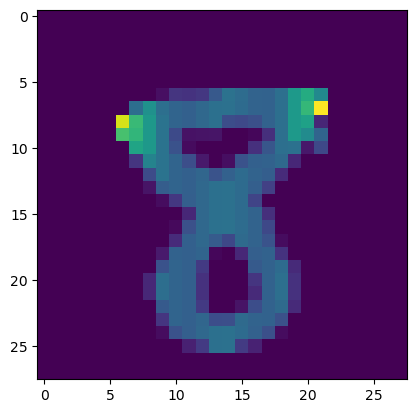

In [31]:
plt.imshow(x_test[128])

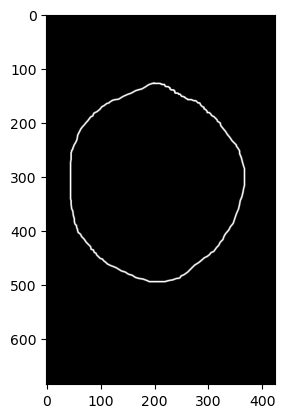

1/1 [==============================] - 0s 26ms/step
0


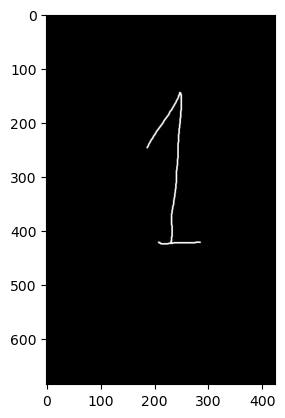

1/1 [==============================] - 0s 25ms/step
1


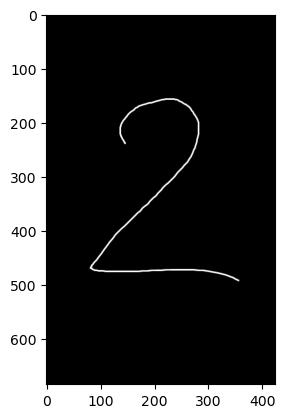

1/1 [==============================] - 0s 25ms/step
2


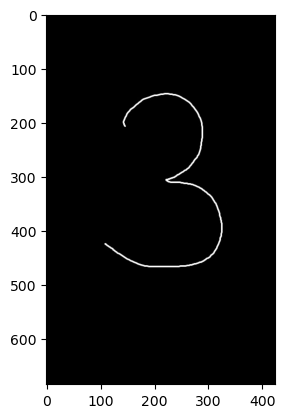

1/1 [==============================] - 0s 29ms/step
3


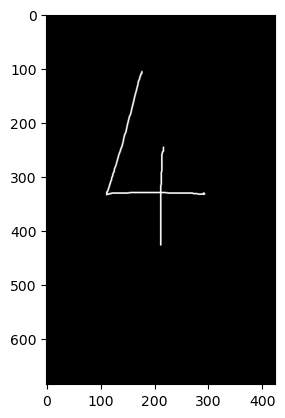

1/1 [==============================] - 0s 25ms/step
4


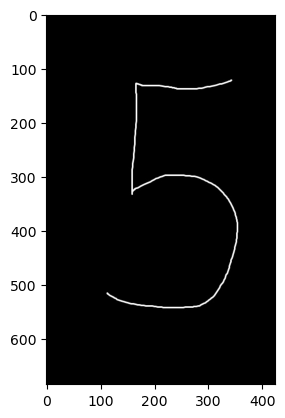

1/1 [==============================] - 0s 33ms/step
5


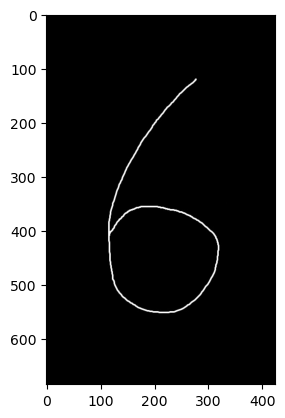

1/1 [==============================] - 0s 27ms/step
6


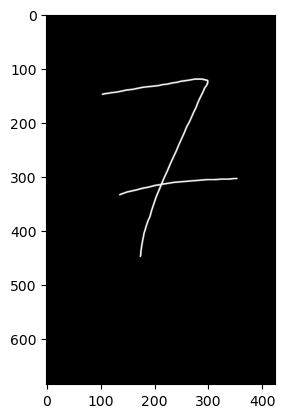

1/1 [==============================] - 0s 30ms/step
7


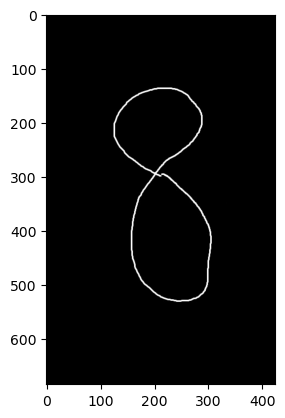

1/1 [==============================] - 0s 25ms/step
8


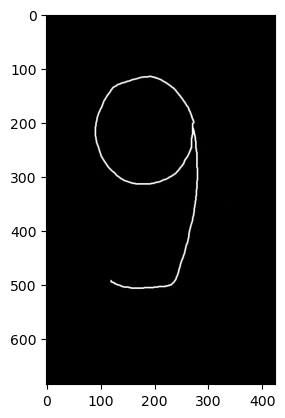

1/1 [==============================] - 0s 30ms/step
9


In [39]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
i=0
for i in range(0,10):
    img=cv2.imread('{}.jpg'.format(i))
    plt.imshow(img)
    plt.show()
    
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
    newing=tf.keras.utils.normalize(resized,axis=1)
    newing=np.array(newing).reshape(-1,IMG_SIZE,IMG_SIZE,1)
    predictions=model.predict(newing)
    print(np.argmax(predictions))